**Ph 22 Assignment 3 (Set 4)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
#copy pasting from assignment 1 (set 2)
def rungekutta(xilist, t, h, fx):
    
    vec = np.array(xilist)
    
    k1 = np.array(h * fx(vec,t))
    vec1 = vec + (k1 / 2)
    
    k2 = np.array(h * fx(vec1, t + h/2))
    vec2 = vec + (k2 / 2)
    
    k3 = np.array(h * fx(vec2, t + h/2))
    vec3 = vec + k3
    
    k4 = np.array(h * fx(vec3, t + h))
    
    
    newvec = vec + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
    
    return(newvec)


#copy pasting from assignment 2 (set 3)
def rkstepper(xilist, tarray, h, fx):
    
    xicurrent = []
    xicurrent.append(xilist)
    
    for i, time in enumerate(tarray):
        
        xinew = rungekutta(xicurrent[i], time, h, fx)
        xicurrent.append(xinew)
    
    return(xicurrent)


def nbodystep(xilist, t):
    
    a = 0.1
    
    length = len(xilist)
    xinew = np.zeros(length)
    N = int(length/4)
    
    for i in range(N):
        
        ri = np.array([xilist[i*4],xilist[1 + i*4]])
        vi = np.array([xilist[2 + i*4],xilist[3 + i*4]])
        
        xnew, ynew = vi
        xinew[i*4] += xnew
        xinew[1 + i*4] += ynew
        
        
        for j in range(N):
            
            if i != j:
                
                rj = np.array([xilist[j*4],xilist[1 + j*4]])
                vj = np.array([xilist[2 + j*4],xilist[3 + j*4]])
                
                dif = rj - ri
                
                norm = np.linalg.norm(dif)
                
                grav = dif / (norm*(norm**2 + a**2))  #this is the new v value
                
                vx, vy = grav
                
                xinew[2 + i*4] += vx
                xinew[3 + i*4] += vy
                
    array = np.array(xinew)
    
    return(array)

In [3]:
def particlevals(velmag):
    
    ysign = [-1,1][random.randrange(2)]
    vysign = [-1,1][random.randrange(2)]
    
    r = random.uniform(-1,1)
    x = r * random.uniform(-1,1)
    y = np.sqrt(r**2 - x**2) * ysign
    
    vx = 0.1 * random.uniform(-1,1)
    vy = np.sqrt(0.1**2 - vx**2) * vysign
    
    return([x,y,vx,vy])

def particlearray(N, velmag):
    
    array = []
    
    for i in range(N):
        
        particle = particlevals(velmag)
        
        array.extend(particle)
        
    return(array)
    

In [4]:
timearray = np.linspace(0,1,300)
hundredsteps = rkstepper(particlearray(100,0.1), timearray, 0.001, nbodystep)

In [5]:
zerovelocity = rkstepper(particlearray(100,0.0), timearray, 0.001, nbodystep)

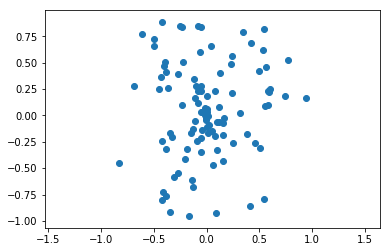

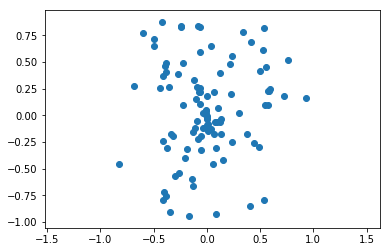

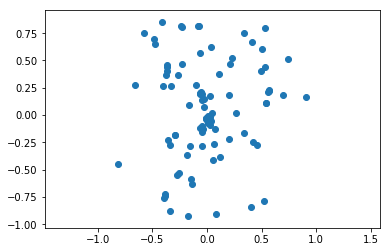

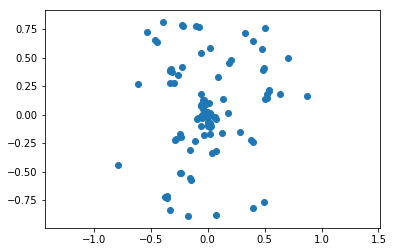

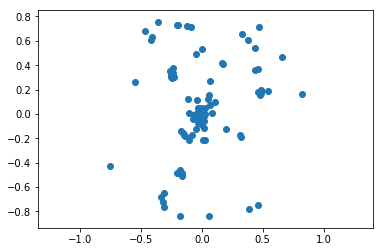

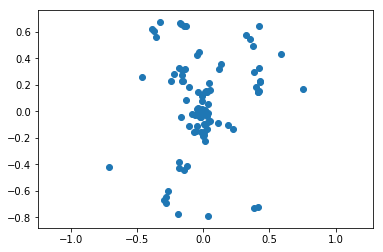

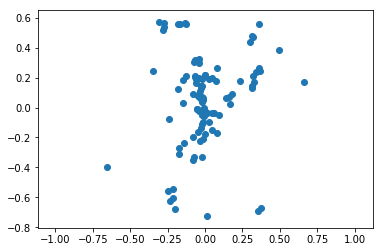

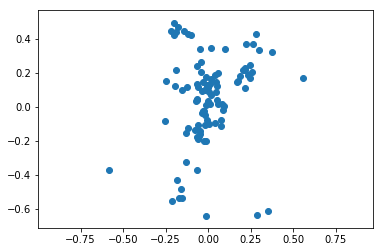

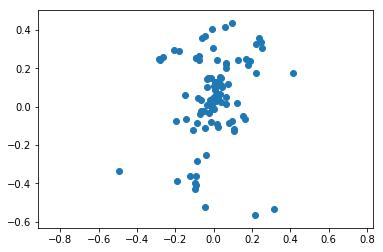

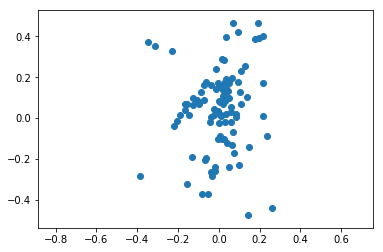

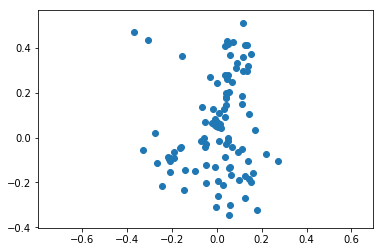

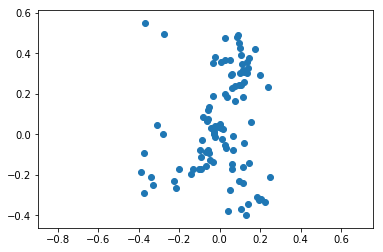

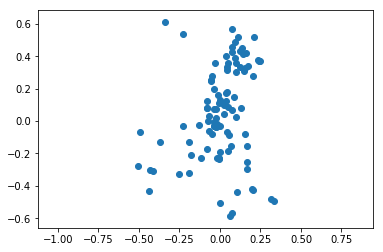

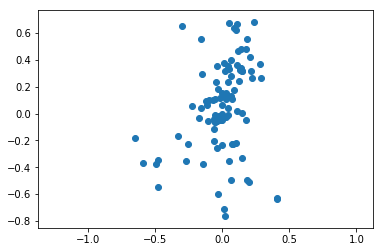

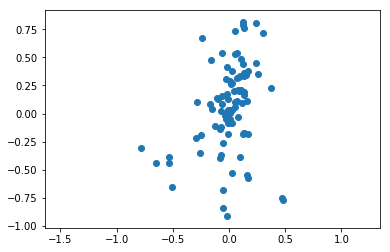

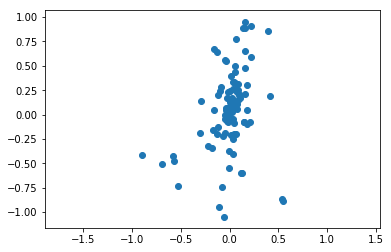

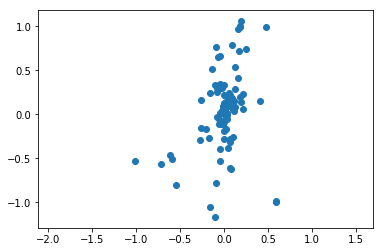

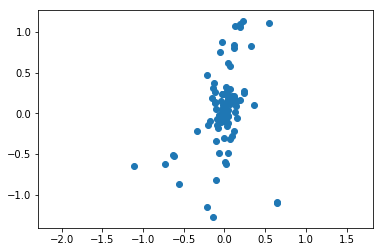

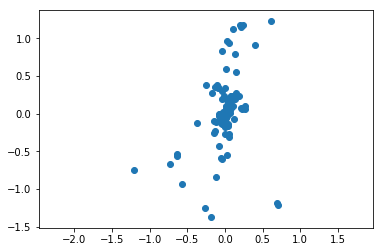

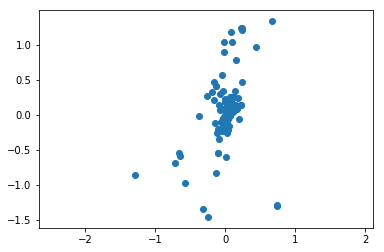

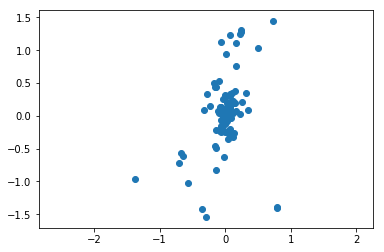

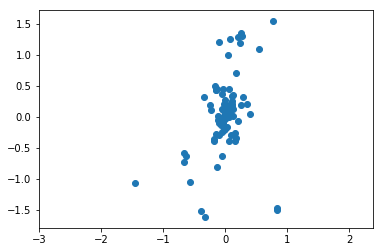

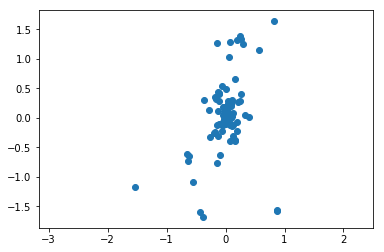

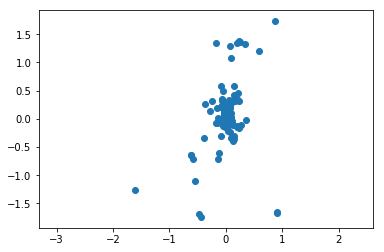

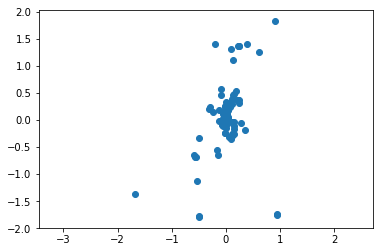

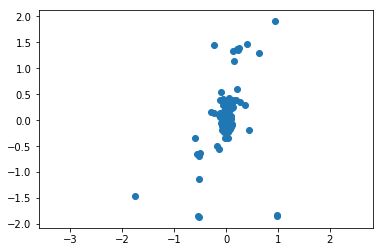

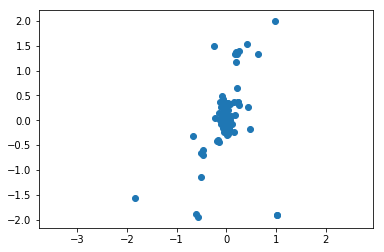

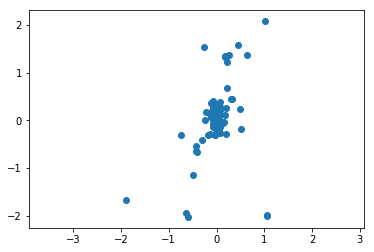

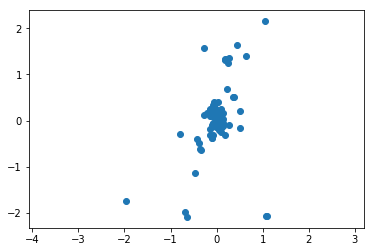

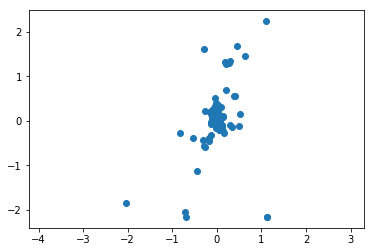

In [6]:
for i in range(30):
    plt.scatter(hundredsteps[i*10][::4],hundredsteps[i*10][1::4])
    plt.axis('equal')
    plt.show()

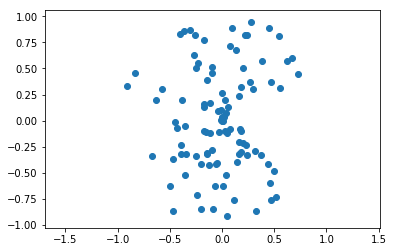

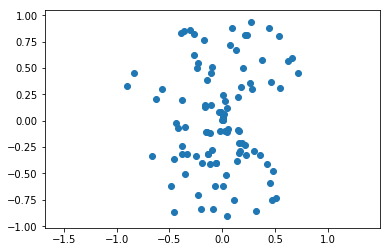

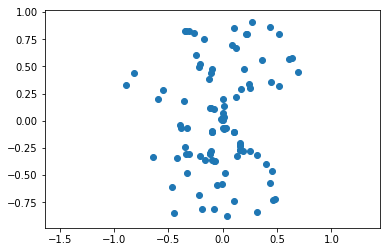

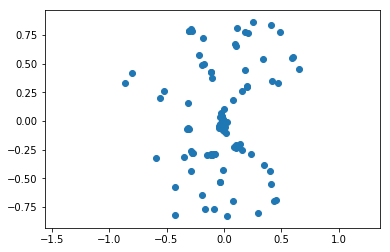

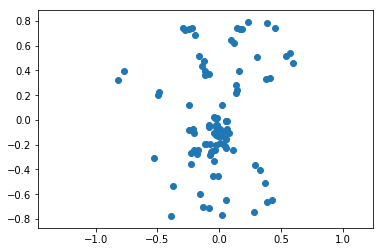

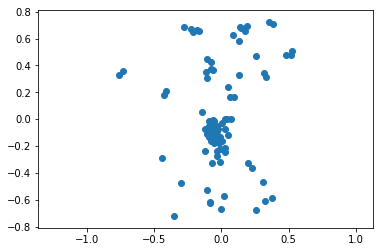

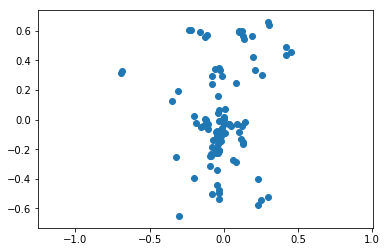

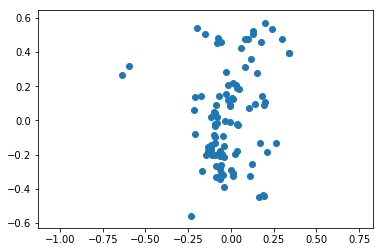

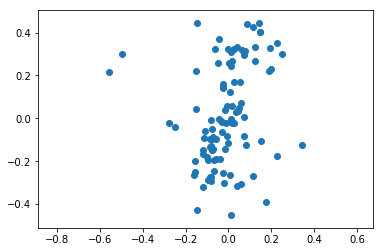

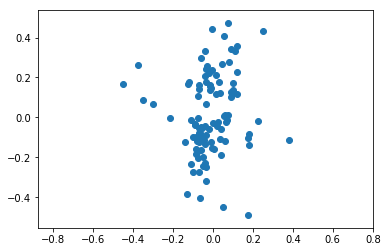

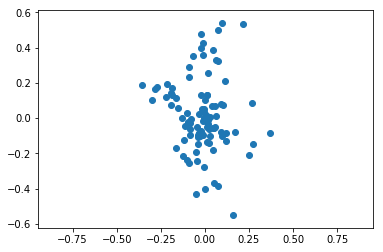

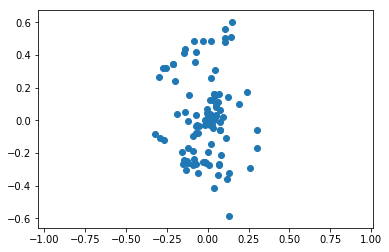

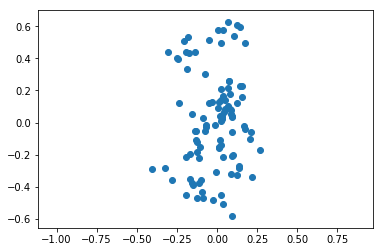

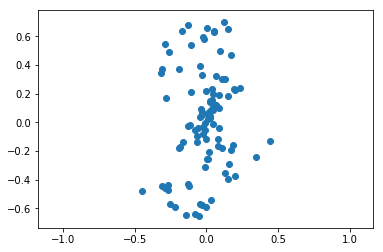

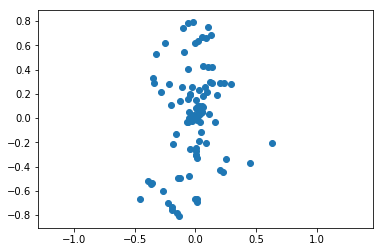

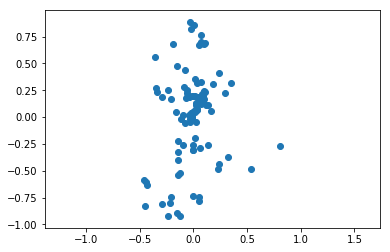

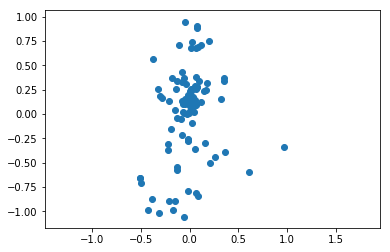

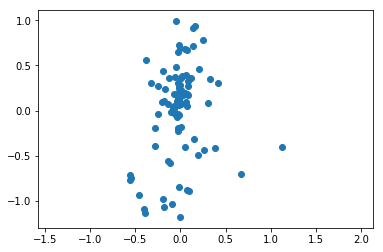

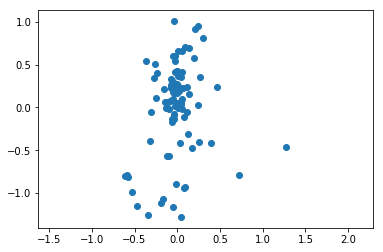

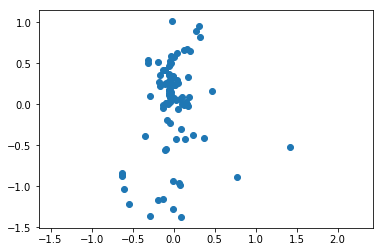

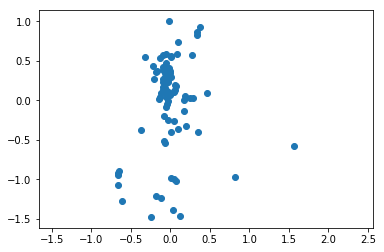

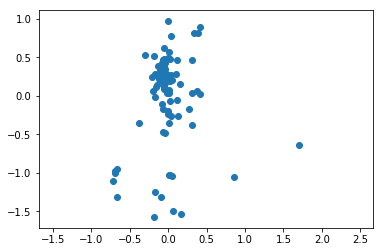

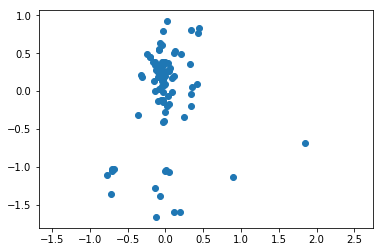

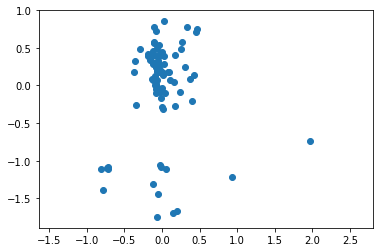

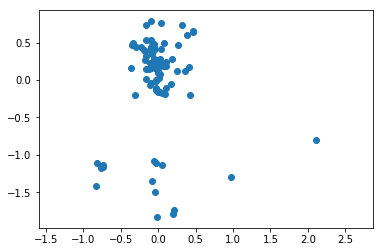

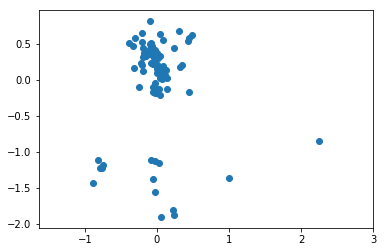

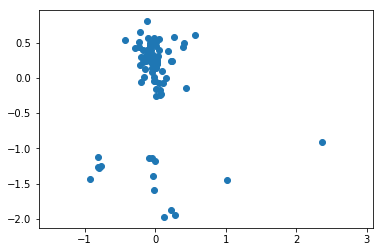

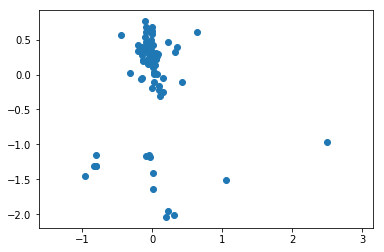

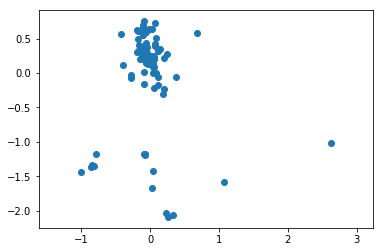

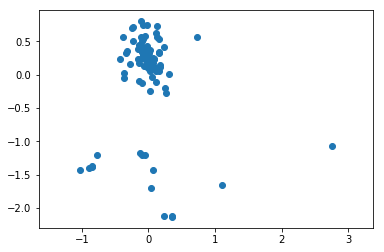

In [7]:
for i in range(30):
    plt.scatter(zerovelocity[i*10][::4],zerovelocity[i*10][1::4])
    plt.axis('equal')
    plt.show()

Now to plot some radial densities at different timestamps to see whether a core evolves. 

In [8]:
def raddens(stepseq):
    #stepseq example: zerovelocity[0]
    xlist = stepseq[::4]
    ylist = stepseq[1::4]
    
    rlist = []
    
    for i in range(len(xlist)):
        x = xlist[i]
        y = ylist[i]
        r = np.sqrt(x**2 + y**2)
        
        rlist.append(r)
    return(rlist)

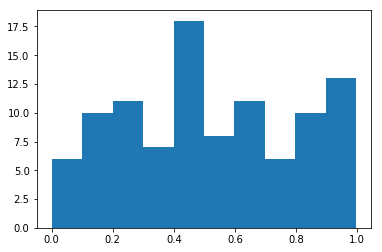

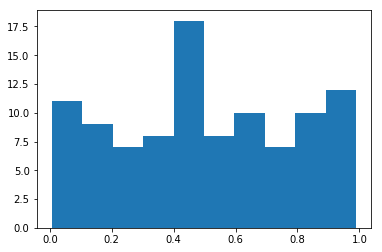

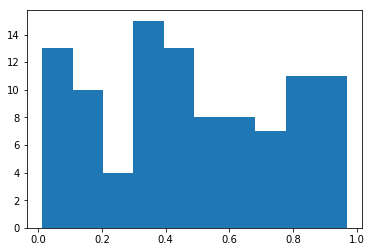

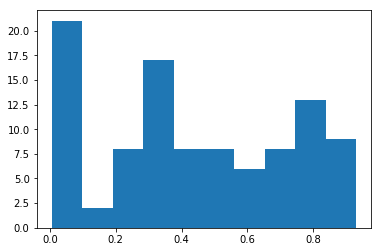

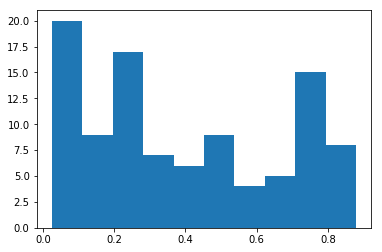

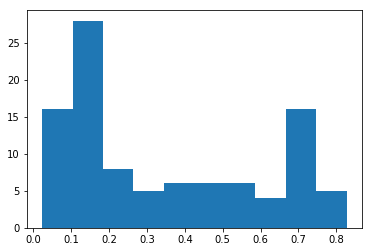

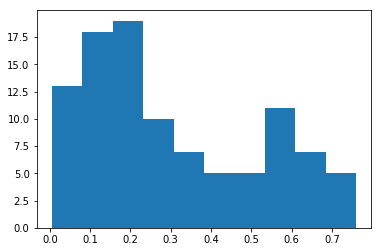

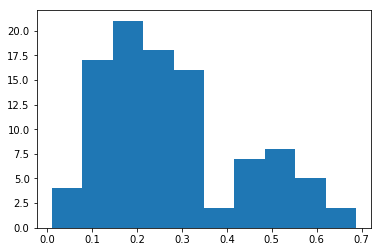

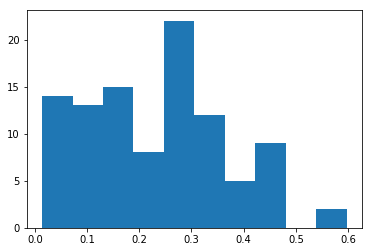

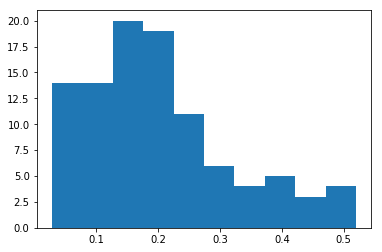

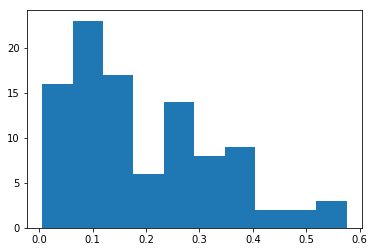

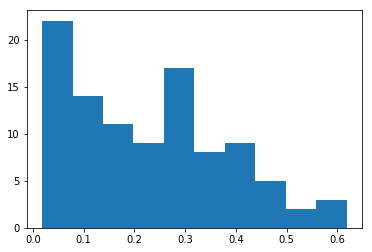

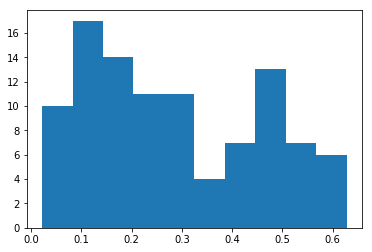

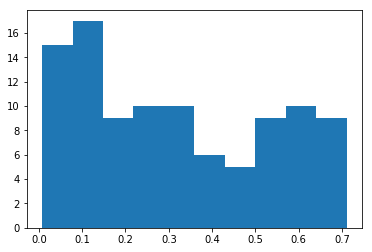

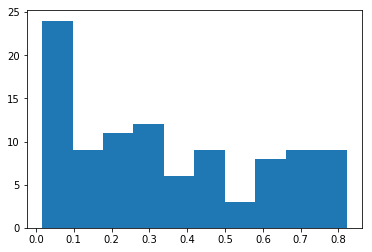

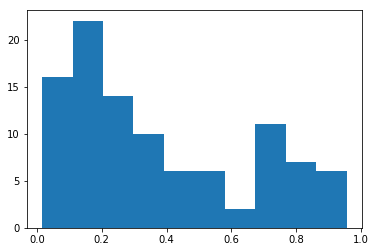

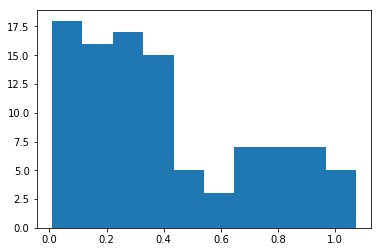

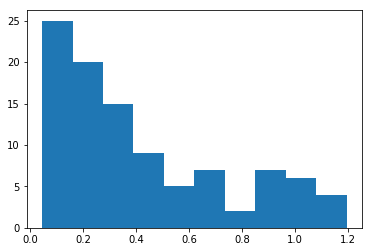

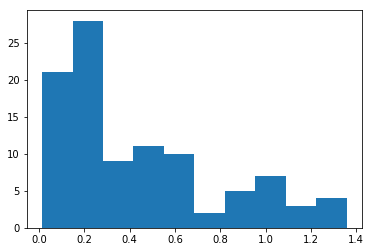

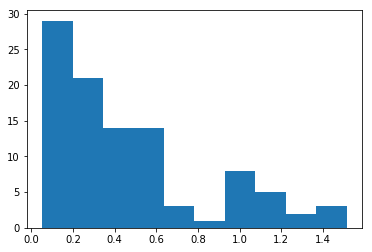

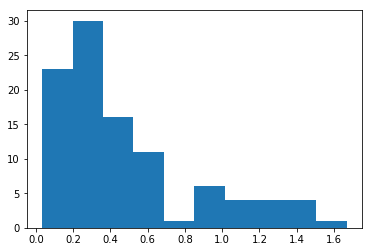

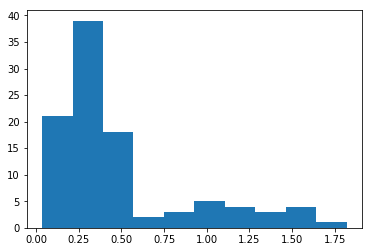

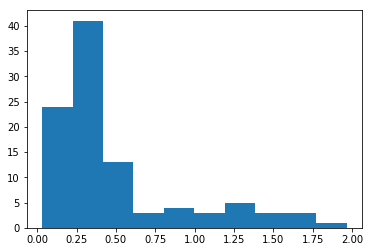

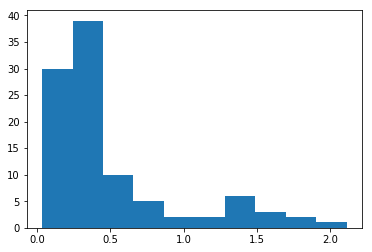

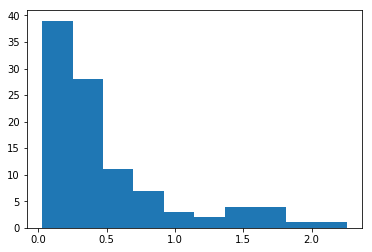

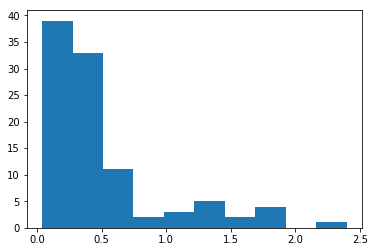

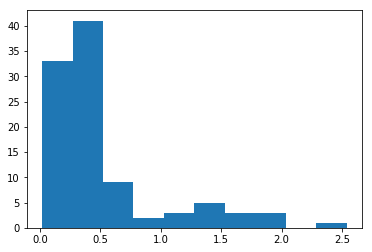

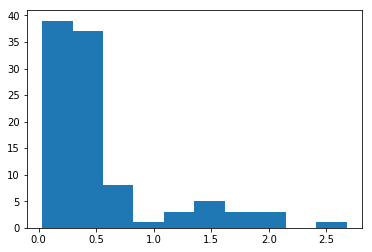

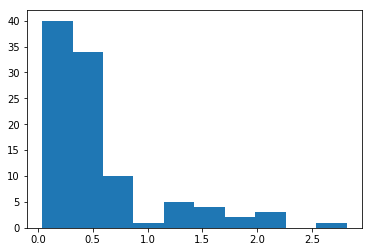

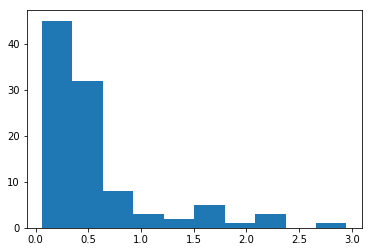

In [17]:
for i in range(30):
    plt.hist(raddens(zerovelocity[i*10]))
    plt.show()

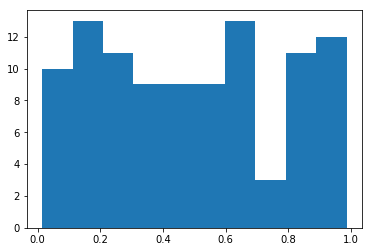

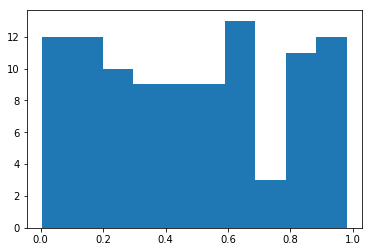

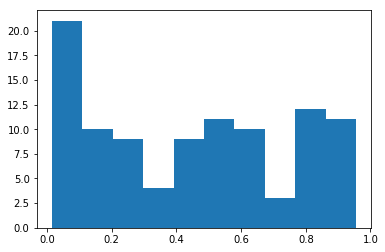

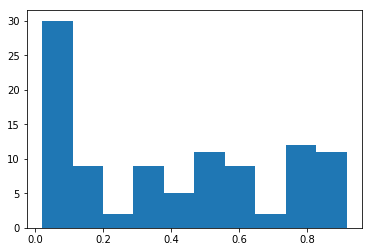

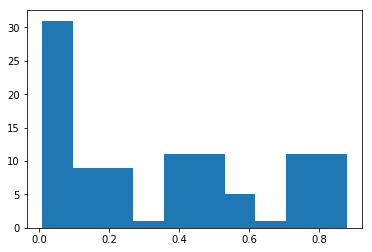

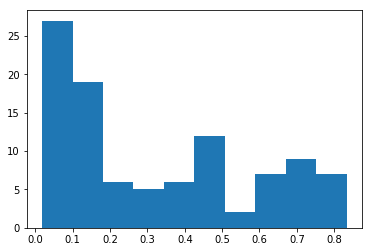

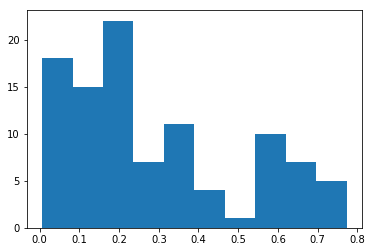

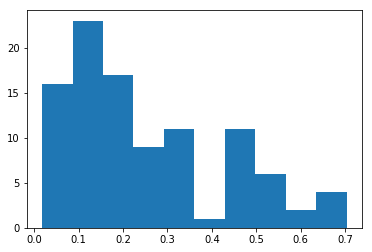

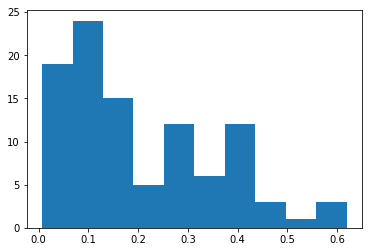

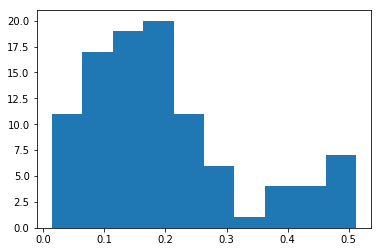

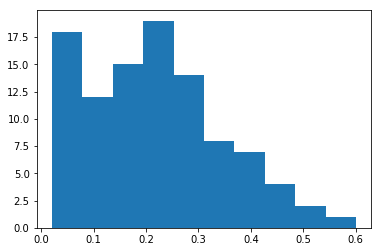

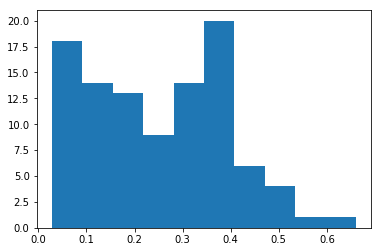

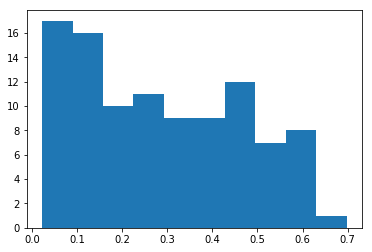

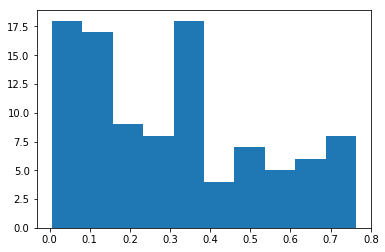

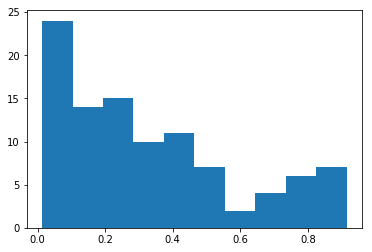

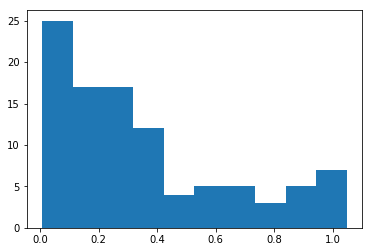

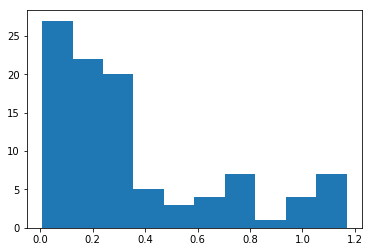

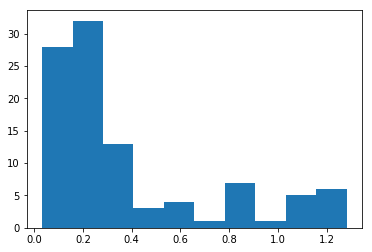

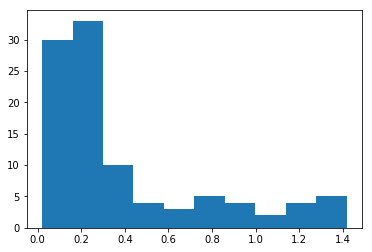

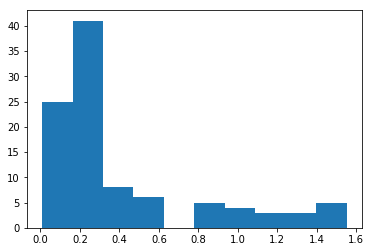

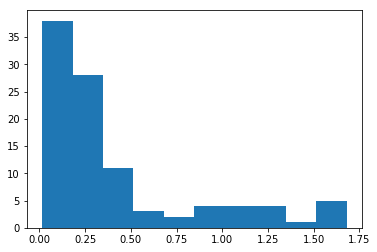

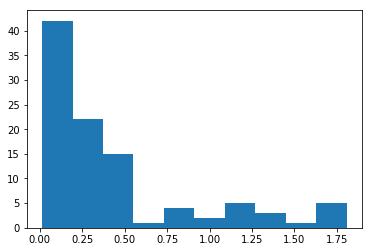

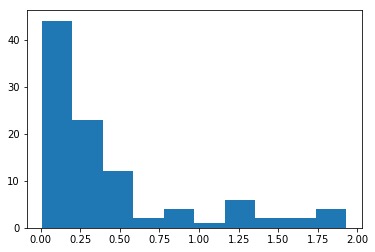

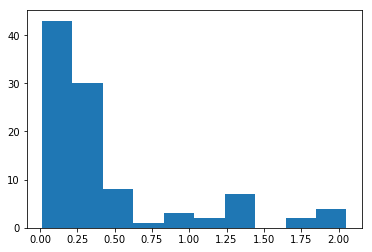

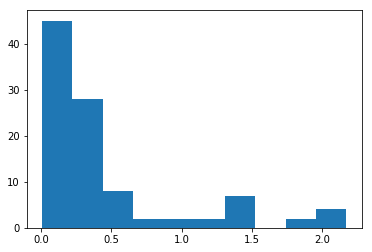

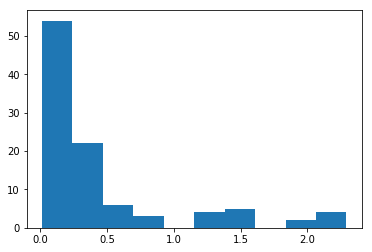

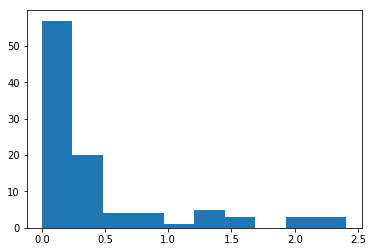

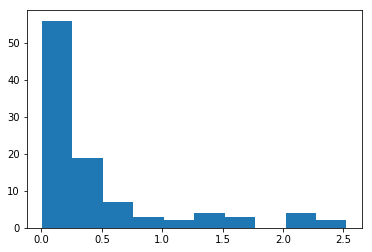

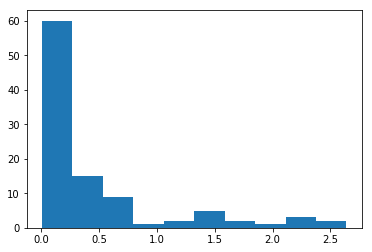

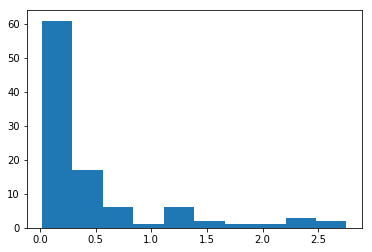

In [18]:
for i in range(30):
    plt.hist(raddens(hundredsteps[i*10]))
    plt.show()

I believe these results constitute a core, as desired :)